In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#algo1 = pd.read_csv('results/algo1.csv')
algo2 = pd.read_csv('results/algo2.csv')
optsol = pd.read_csv('results/optsol.csv')

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [8]:
results = pd.merge(algo2, optsol, how='outer')

results['input_size'] = results['input'].map(lambda x: x.count('-') + 1)
results['vertex_count'] = results['input'].map(lambda x: x.split('-')[0].count(',') + 1)

keywords = ['algo2', 'optsol']
for keyword in keywords:
    results[f'num_rel_{keyword}'] = results[f'output_{keyword}'].map(lambda x: x.count('('))

print(results.shape)
results.sample(n=5)

(1787, 10)


,input,cost_algo2,output_algo2,runtime_algo2,cost_optsol,output_optsol,input_size,vertex_count,num_rel_algo2,num_rel_optsol
537,"[1, 2, 3, 4]-[1, 3, 2, 4]-[2, 3, 1, 4]-[2, 4, 1, 3]-[2, 4, 3, 1]-[4, 2, 1, 3]",7,"['[(1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]', '[(1, 2), (1, 3), (1, 4), (2, 4), (3, 2), (3, 4)]', '[(1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 4)]', '[(2, 1), (2, 3), (2, 4), (4, 1), (4, 3)]', '[(1, 3), (2, 1), (2, 3), (4, 1), (4, 3)]', '[(2, 1), (2, 3), (2, 4), (3, 1), (4, 1), (4, 3)]', '[(1, 3), (2, 1), (2, 3), (4, 1), (4, 2), (4, 3)]']",0.000465,4,"['[(2, 3), (2, 4), (2, 1), (3, 4), (3, 1), (1, 4)]', '[(2, 3), (2, 4), (2, 1), (4, 3), (3, 1), (4, 1)]', '[(2, 4), (1, 2), (3, 4), (1, 4), (1, 3)]', '[(2, 1), (4, 1), (4, 3), (2, 3), (1, 3)]']",6,4,39,22
1313,"[1, 4, 2, 3]-[1, 4, 3, 2]-[2, 1, 3, 4]-[2, 3, 1, 4]-[2, 3, 4, 1]-[2, 4, 3, 1]-[3, 1, 2, 4]-[3, 1, 4, 2]-[3, 2, 1, 4]-[3, 4, 1, 2]-[4, 1, 2, 3]-[4, 1, 3, 2]-[4, 2, 3, 1]-[4, 3, 2, 1]",17,"['[(1, 2), (1, 3), (4, 2), (4, 3)]', '[(1, 2), (1, 3), (4, 2), (4, 3)]', '[(1, 2), (1, 3), (3, 2), (4, 2), (4, 3)]', '[(1, 4), (2, 1), (2, 3), (2, 4), (3, 4)]', '[(2, 1), (2, 3), (2, 4), (3, 1), (3, 4)]', '[(1, 4), (2, 1), (2, 4), (3, 1), (3, 4)]', '[(2, 1), (2, 3), (2, 4), (3, 1), (4, 1)]', '[(2, 1), (2, 3), (3, 1), (4, 1), (4, 3)]', '[(1, 2), (1, 4), (3, 1), (3, 2), (3, 4)]', '[(1, 4), (2, 4), (3, 1), (3, 2), (3, 4)]', '[(1, 2), (3, 1), (3, 2), (3, 4), (4, 2)]', '[(1, 4), (2, 1), (2, 4), (3, 1), (3, 2), (3, 4)]', '[(1, 2), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2)]', '[(1, 2), (1, 3), (4, 1), (4, 2), (4, 3)]', '[(1, 2), (1, 3), (3, 2), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (3, 1), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3)]']",0.005124,5,"['[(2, 3), (2, 4), (2, 1), (3, 4), (3, 1), (4, 1)]', '[(2, 4), (1, 4), (2, 1), (3, 4)]', '[(3, 1), (4, 1), (2, 1), (4, 3)]', '[(3, 1), (3, 2), (1, 2), (3, 4)]', '[(1, 2), (1, 3), (4, 2), (4, 3)]']",14,4,87,22
1588,"[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, 2, 3]-[1, 4, 3, 2]-[2, 1, 3, 4]-[2, 3, 1, 4]-[2, 4, 1, 3]-[2, 4, 3, 1]-[3, 1, 2, 4]-[3, 1, 4, 2]-[3, 2, 4, 1]-[3, 4, 1, 2]-[3, 4, 2, 1]-[4, 2, 1, 3]-[4, 2, 3, 1]-[4, 3, 2, 1]",20,"['[(1, 2), (1, 3), (1, 4), (2, 3), (4, 3)]', '[(1, 2), (1, 4), (3, 2), (3, 4)]', '[(1, 2), (1, 4), (3, 2), (3, 4)]', '[(1, 2), (1, 3), (1, 4), (3, 2), (4, 2)]', '[(1, 2), (1, 4), (3, 2), (3, 4), (4, 2)]', '[(1, 2), (1, 3), (1, 4), (4, 2), (4, 3)]', '[(1, 2), (1, 3), (1, 4), (3, 2), (4, 2), (4, 3)]', '[(1, 4), (2, 1), (2, 3), (2, 4), (3, 4)]', '[(1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 4)]', '[(2, 1), (2, 3), (4, 1), (4, 3)]', '[(2, 1), (2, 3), (4, 1), (4, 3)]', '[(2, 1), (2, 3), (3, 1), (4, 1), (4, 3)]', '[(1, 2), (1, 4), (3, 1), (3, 2), (3, 4)]', '[(1, 2), (3, 1), (3, 2), (3, 4), (4, 2)]', '[(2, 1), (3, 1), (3, 2), (3, 4), (4, 1)]', '[(3, 1), (3, 2), (3, 4), (4, 1), (4, 2)]', '[(2, 1), (3, 1), (3, 2), (4, 1), (4, 2)]', '[(2, 1), (2, 3), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (3, 1), (4, 1), (4, 2), (4, 3)]', '[(2, 1), (3, 1), (3, 2), (4, 1), (4, 2), (4, 3)]']",0.004002,5,"['[(1, 2), (4, 3), (1, 4), (2, 3), (1, 3)]', '[(2, 4), (2, 1), (3, 4), (1, 4), (2, 3)]', '[(3, 1), (3, 2), (4, 1), (3, 4)]', '[(3, 2), (1, 2), (1, 4)]', '[(4, 1), (2, 1), (4, 3)]']",17,4,99,20
362,"[1, 3, 2, 4]-[2, 4, 3, 1]-[3, 4, 1, 2]-[4, 1, 3, 2]",4,"['[(1, 2), (1, 3), (1, 4), (2, 4), (3, 2), (3, 4)]', '[(2, 1), (2, 3), (2, 4), (3, 1), (4, 1), (4, 3)]', '[(1, 2), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2)]', '[(1, 2), (1, 3), (3, 2), (4, 1), (4, 2), (4, 3)]']",0.000201,4,"['[(2, 4), (1, 2), (3, 4), (3, 2), (1, 3), (1, 4)]', '[(2, 3), (2, 4), (2, 1), (4, 3), (3, 1), (4, 1)]', '[(1, 2), (3, 4), (3, 1), (3, 2), (4, 1), (4, 2)]', '[(1, 3), (1, 2), (4, 3), (3, 2), (4, 1), (4, 2)]']",4,4,24,24
1310,"[1, 2, 3, 4]-[1, 2, 4, 3]-[1, 3, 4, 2]-[1, 4, 2, 3]-[1, 4, 3, 2]-[2, 1, 3, 4]-[2, 1, 4, 3]-[2, 4, 3, 1]-[3, 1, 2, 4]-[3, 1, 4, 2]-[3, 2, 1, 4]-[4, 1, 2, 3]-[4, 3, 1, 2]-[4, 3, 2, 1]",19,"['[(1, 3), (1, 4), (2, 3), (2, 4)]', '[(1, 3

<AxesSubplot:xlabel='input_size', ylabel='runtime_algo2'>

<Figure size 432x288 with 0 Axes>

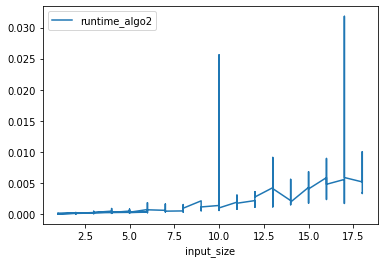

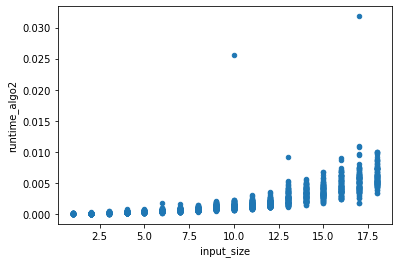

In [3]:
runtime = results[['input_size', 'runtime_algo2']]

plt.figure()
runtime.plot(x='input_size', y='runtime_algo2')
runtime.plot.scatter(x='input_size', y='runtime_algo2')

<AxesSubplot:xlabel='input_size', ylabel='cost_optsol'>

<Figure size 432x288 with 0 Axes>

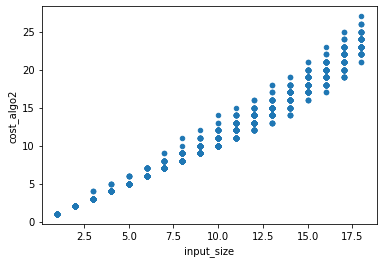

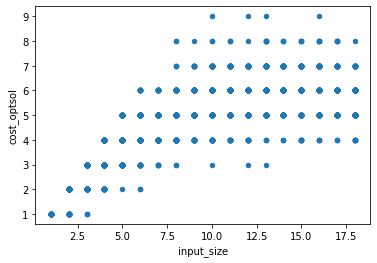

In [4]:
cost = results[['input_size', 'vertex_count', 'cost_algo2', 'cost_optsol']]

plt.figure()
cost.plot.scatter(x='input_size', y='cost_algo2')
cost.plot.scatter(x='input_size', y='cost_optsol')

<AxesSubplot:xlabel='input_size', ylabel='num_rel_optsol'>

<Figure size 432x288 with 0 Axes>

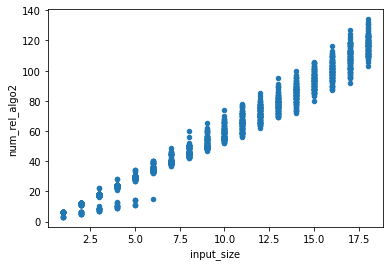

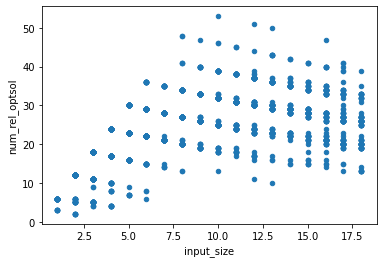

In [5]:
num_rel = results[['input_size', 'num_rel_algo2', 'num_rel_optsol']]

plt.figure()
num_rel.plot.scatter(x='input_size', y='num_rel_algo2')
num_rel.plot.scatter(x='input_size', y='num_rel_optsol')

In [6]:
pd.set_option('display.max_rows', None)

optapprox = results[(results['cost_optsol'] == results['cost_algo2'])]
optapprox = optapprox[['input', 'output_algo2']]
print(optapprox.shape)
optapprox

(264, 2)


,input,output_algo2
0,"[1, 2, 3]","['[(1, 2), (1, 3), (2, 3)]']"
1,"[1, 3, 2]","['[(1, 2), (1, 3), (3, 2)]']"
2,"[2, 1, 3]","['[(1, 3), (2, 1), (2, 3)]']"
3,"[2, 3, 1]","['[(2, 1), (2, 3), (3, 1)]']"
4,"[3, 1, 2]","['[(1, 2), (3, 1), (3, 2)]']"
5,"[3, 2, 1]","['[(2, 1), (3, 1), (3, 2)]']"
8,"[1, 2, 3]-[2, 3, 1]","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (2, 3), (3, 1)]']"
9,"[1, 2, 3]-[3, 1, 2]","['[(1, 2), (1, 3), (2, 3)]', '[(1, 2), (3, 1), (3, 2)]']"
10,"[1, 2, 3]-[3, 2, 1]","['[(1, 2), (1, 3), (2, 3)]', '[(2, 1), (3, 1), (3, 2)]']"
11,"[1, 3, 2]-[2, 1, 3]","['[(1, 2), (1, 3), (3, 2)]', '[(1, 3), (2, 1), (2, 3)]']"
